<a href="https://colab.research.google.com/github/thiagofuruchima/weratedogs_dsnd/blob/main/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np
import json
import time
import tweepy
from tweepy import TweepError
from pandas.io.json import json_normalize
from scipy import stats
from statsmodels import stats as sms
import matplotlib.pyplot as plt

# Data Wrangling Process
<ol>
    <li><strong> Gather; </strong></li>
    <li><strong> Assess; </strong></li>
    <li><strong> Clean. </strong></li>
</ol>

## 1. Gather the Data

#### twitter-archive-enhanced.csv

In [3]:
df_twitter_archive = pd.read_csv("data/twitter-archive-enhanced.csv", sep=',')

In [4]:
df_twitter_archive.shape

(2356, 17)

In [5]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### image-predictions.tsv

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [8]:
response = requests.get(url)
if (response.status_code==200):
    with open('image-predictions.tsv', 'wb') as file:
        file.write(response.content)

In [9]:
df_image_predictions = pd.read_csv('data/image-predictions.tsv', sep='\t')

In [10]:
df_image_predictions.shape

(2075, 12)

In [11]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### tweet_json.txt

In [14]:
import twitter_config

In [15]:
auth = tweepy.OAuthHandler(twitter_config.consumer_key, twitter_config.consumer_secret)

auth.set_access_token(twitter_config.access_token, twitter_config.access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# get all unique tweet_ids from the twitter-archive-enhanced.csv dataframe
tweet_ids = set(df_twitter_archive['tweet_id'].unique())

with open('all_tweet.json', 'wt') as file:
    for tweet_id in tweet_ids:
        
        print ('Reading tweet {}'.format(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
            time.sleep(1)
        except TweepError as e:
            print ('Error reading tweet {}'.format(tweet_id))
            print(e)

In [17]:
list_df = []
with open('data/all_tweet.json') as file:
  for line in file:
    df_tweet = pd.DataFrame(pd.json_normalize(json.loads(line)))
    list_df.append(df_tweet)

df_all_tweet_info = pd.concat(list_df, axis=0)

In [18]:
df_all_tweet_info.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
0,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_retweet_favorite_info = df_all_tweet_info[['id','retweet_count', 'favorite_count']]

In [20]:
df_retweet_favorite_info.shape

(2331, 3)

In [21]:
df_retweet_favorite_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 72.8 KB


In [22]:
df_retweet_favorite_info.head()

,id,retweet_count,favorite_count
0,891815181378084864,3632,22828
0,892420643555336193,7372,35072
0,891327558926688256,8137,36622
0,891689557279858688,7550,38346
0,890971913173991426,1764,10743


## 2. Assess

#### Quality Issues

In [23]:
mask = df_twitter_archive.name.str.contains('^[a-z]', regex = True)
df_twitter_archive[mask].name.value_counts().sort_values(ascending=False)

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
such             1
space            1
this             1
his              1
old              1
incredibly       1
my               1
officially       1
all              1
unacceptable     1
light            1
by               1
infuriating      1
life             1
Name: name, dtype: int64

> 1. We found some problems in dog names such as: 'None', 'a', 'the', an', 'very', 'all', etc.

> 2. After visual inspecting we found the following problems in rating_rumerator:

<ul>
<li>
45 - This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
</li>
<li>
784 - RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
</li>
<li>
1068 - After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
</li>
</ul>

> 3. After visual inspecting, we found the following problems in rating_denominator:
<ul>
<li>
342 - @docmisterio account started on 11/15/15
</li>
<li>
784 - RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
</li>
<li>
1068 - After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
</li>
<li>
1662 - This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
</li>
</ul>

In [24]:
df_twitter_archive[df_twitter_archive[['retweeted_status_id', 'retweeted_status_user_id',	'retweeted_status_timestamp']].notna().any(axis=1)].shape

(181, 17)

> 4. Programatically, we identified 181 <strong>retweets</strong> that should be excluded from the database.

In [25]:
df_twitter_archive[df_twitter_archive[['in_reply_to_status_id', 'in_reply_to_user_id']].notna().any(axis=1)].shape

(78, 17)

> 5. Programatically, we identified 78 <strong>replies</strong> that should be excluded from the database.

In [26]:
df_twitter_archive['timestamp'].dtype

dtype('O')

> 6. Programatically, we identified that the timestamp columns is with incorrect data type.

In [27]:
df_twitter_archive['tweet_id'].isin(list(df_image_predictions['tweet_id'])).value_counts()

True     2075
False     281
Name: tweet_id, dtype: int64

> 7. Programatically, we identified that 281 observations don't have corresponding image.

In [28]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> 8. The columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',	'retweeted_status_user_id', 'retweeted_status_timestamp' are not relevant to our analysis and should be dropped.

In [29]:
df_image_predictions[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


> 9. Dog types without letter case standard. Also using "_" as word separator.

#### Tidyness Issues

> 1. All three DataFrames hold information about the same entity, therefore, it should be considered as a single DataFrame.
> 2. The dog types are in four different columns, but the information could in fact be in only one.

## 3. Clean

Before any coding, let make a copy of the three datasets:

In [30]:
df_twitter_archive_copy = df_twitter_archive.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_retweet_favorite_info_copy = df_retweet_favorite_info.copy()

Now, lets deal with every issue previously assessed, using the "define", "code" and "test" approach.

<hr/>

**Define:**

Merge the thee datasets

**Code:**

In [31]:
_ = pd.merge(df_twitter_archive, df_image_predictions, on='tweet_id', how='inner')
df = pd.merge(_, df_retweet_favorite_info, left_on='tweet_id', right_on='id', how='inner')

**Test:**

In [32]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,7372,35072
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,5494,30366


<hr>

**Define:**

Fix dog name issues.

**Code:**

In [33]:
# replace wrong dog names with nan
df['name'].replace({key : np.NaN for key in df_twitter_archive[mask].name.unique()}, inplace=True)

**Test:**

In [34]:
df['name'].isin(set(df_twitter_archive[mask].name)).any()

False

<hr/>

**Define:**

Extract dog stage from text and exclude the unecessary columns

**Code:**

In [35]:
# extract the stage from the text
df['stage'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [36]:
# drop the separate stage columns
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**Test:**

In [37]:
df['stage'].value_counts()

pupper     230
doggo       73
puppo       28
floofer      3
Name: stage, dtype: int64

In [38]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id',
       'retweet_count', 'favorite_count', 'stage'],
      dtype='object')

<hr/>

**Define:**

Drop replied tweets and replier columns

**Code:**

In [39]:
# drop replier values
idx = df[df[['in_reply_to_status_id', 'in_reply_to_user_id']].notna().any(axis=1)].index
df.drop(idx, inplace=True)

In [40]:
# drop the unecessary replier columns
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**Test**

In [41]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweet_count',
       'favorite_count', 'stage'],
      dtype='object')

<hr/>

**Define:**

Drop retweeted tweets and retweet columns

**Code:**

In [42]:
# drop retweet values
idx = df[df[['retweeted_status_id', 'retweeted_status_user_id',	'retweeted_status_timestamp']].notna().any(axis=1)].index
df.drop(idx, inplace=True)

In [43]:
# drop the unecessary retweet columns
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**Test:**

In [44]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'id', 'retweet_count', 'favorite_count', 'stage'],
      dtype='object')

<hr/>

**Define:**

Convert timestamo column from object to date.

**Code:**

In [45]:
# convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

**Test:**

In [46]:
df['timestamp'].dtype

datetime64[ns, UTC]

<hr/>

**Define:**

Drop duplicated id columns

**Code:**

In [47]:
# drop duplicated id column
df.drop(['id'], axis='columns', inplace=True)

**Test:**

In [48]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'stage'],
      dtype='object')

<hr/>

**Define:**

Fix numerator and denominator issues:

**Code:**

In [49]:
# Fix data issues: 13/10 to 13.5/10
idx1 = df['text'].str.contains('This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10')
df.loc[idx1, ['rating_numerator', 'rating_denominator']] = [13.5, 10]

In [50]:
# Fix data issues: 9/11 to 14/10
idx2 = df['text'].str.contains('After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP')
df.loc[idx2, ['rating_numerator', 'rating_denominator']] = [14, 10]

In [51]:
# Fix data issues: 7/11 to 10/10
idx3 = df['text'].str.contains('This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10')
df.loc[idx3, ['rating_numerator', 'rating_denominator']] = [10, 10]

**Test:**

In [52]:
df.loc[idx1, ['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
40,This is Bella. She hopes her smile made you sm...,13.5,10


In [53]:
df.loc[idx2, ['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
863,"After so many requests, this is Bretagne. She ...",14.0,10


In [54]:
df.loc[idx3, ['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1392,This is Darrel. He just robbed a 7/11 and is i...,10.0,10


<hr/>

**Define**:

Fix capitalization issues in dog breeds

**Code:**

In [55]:
# Fix capitalization issues in dog breeds
df['p1'] = df['p1'].str.replace('_', ' ').str.title()
df['p2'] = df['p2'].str.replace('_', ' ').str.title()
df['p3'] = df['p3'].str.replace('_', ' ').str.title()

**Test:**

In [56]:
df[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer


Now, lets save the clean DataFrame

In [57]:
df.to_csv("twitter_archive_master.csv")

# Insights and Visualisations

> First, lets see what are the most common breeds:

In [58]:
is_dog = df['p1_dog']==True
df[is_dog]['p1'].value_counts().head(10)

Golden Retriever      137
Labrador Retriever     92
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                39
Pomeranian             38
Toy Poodle             36
Malamute               29
Name: p1, dtype: int64

> Golden Retriever and Labrador Retriever are the two most common breeds in the dataset. But how "likable" are they compared to other breeds? Do people favorite more tweets if it is about a Golden Retriever? What about a Labrador Retriever?
 <br/>To answer these question we're going to use hypothesis testing on the `favorite_count` column.
 
$$ H_0: \mu_{favorite\_breed} \le \mu_{favorite\_all} $$
$$ H_1: \mu_{favorite\_breed} \gt \mu_{favorite\_all} $$

In [59]:
# Create a function to do the "likable test"
def test_breed_likeability(breed, pop_mean, alpha=0.05):
    """ Test if the favorite mean count of the breed is equal to (or less than) the 
    given mean. """

    # calculate the mean, std and std_error statistics for Golden Retriver
    n = df[df['p1']==breed].shape[0]
    mu = df[df['p1']==breed]['favorite_count'].mean()
    std = df[df['p1']==breed]['favorite_count'].std()
    std_error = std/np.sqrt(n)

    # calculate the t-statistic and the pvalue for Golden Retriver
    t_statistic = (mu-pop_mean)/std_error
    pvalue = 1 - stats.t.cdf(t_statistic, n-1)
    t_statistic, pvalue
    
    if pvalue < alpha:
        # Reject the Null Hypothesis
        return("{} tweets are more likable than other tweets.".format(breed))
    else:
        # Fail to Reject the Null Hypothesis
        return("{} tweets are NOT more likable than other tweets.".format(breed))

In [60]:
# Since we dont have enough samples for all breeds, we're testing only those breeds with at least 30 samples
breeds = ['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Pug',
          'Chow', 'Samoyed', 'Pomeranian', 'Toy Poodle']

alpha = 0.05
print("At the significance level o {} we can state that:\n".format(alpha))
for breed in breeds:
    result = test_breed_likeability(breed, df['favorite_count'].mean(), alpha)
    print(result)

At the significance level o 0.05 we can state that:

Golden Retriever tweets are more likable than other tweets.
Labrador Retriever tweets are NOT more likable than other tweets.
Pembroke tweets are more likable than other tweets.
Chihuahua tweets are NOT more likable than other tweets.
Pug tweets are NOT more likable than other tweets.
Chow tweets are NOT more likable than other tweets.
Samoyed tweets are more likable than other tweets.
Pomeranian tweets are NOT more likable than other tweets.
Toy Poodle tweets are NOT more likable than other tweets.


> Very interesting results. Golden Retriever, Pembroke and Samoyed are very likable dogs! <br/>But what can we say about how popular these breeds are? To "measure" that, we're going to do some hypothesis testing on the `retweet_count` column:

$$ H_0: \mu_{retweet\_breed} \le \mu_{retweet\_all} $$
$$ H_1: \mu_{retweet\_breed} \gt \mu_{retweet\_all} $$

In [61]:
# Create a function to do the "popularity test"
def test_breed_popularity(breed, pop_mean, alpha=0.05):
    """ Test if the retweet mean count of the breed is equal to (or less than) the 
    given mean. """

    # calculate the mean, std and std_error statistics for Golden Retriver
    n = df[df['p1']==breed].shape[0]
    mu = df[df['p1']==breed]['retweet_count'].mean()
    std = df[df['p1']==breed]['retweet_count'].std()
    std_error = std/np.sqrt(n)

    # calculate the t-statistic and the pvalue for Golden Retriver
    t_statistic = (mu-pop_mean)/std_error
    pvalue = 1 - stats.t.cdf(t_statistic, n-1)
    t_statistic, pvalue
    
    if pvalue < alpha:
        # Reject the Null Hypothesis
        return("{} tweets are more popular than other tweets.".format(breed))
    else:
        # Fail to Reject the Null Hypothesis
        return("{} tweets are NOT more popular than other tweets.".format(breed))

In [62]:
# Since we dont have enough samples for all breeds, we're testing only those breeds with at least 30 samples
breeds = ['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Pug',
          'Chow', 'Samoyed', 'Pomeranian', 'Toy Poodle']

alpha = 0.05
print("At the significance level of {} we can state that:\n".format(alpha))
for breed in breeds:
    result = test_breed_popularity(breed, df['retweet_count'].mean(), alpha)
    print(result)

At the significance level of 0.05 we can state that:

Golden Retriever tweets are more popular than other tweets.
Labrador Retriever tweets are NOT more popular than other tweets.
Pembroke tweets are NOT more popular than other tweets.
Chihuahua tweets are NOT more popular than other tweets.
Pug tweets are NOT more popular than other tweets.
Chow tweets are NOT more popular than other tweets.
Samoyed tweets are more popular than other tweets.
Pomeranian tweets are NOT more popular than other tweets.
Toy Poodle tweets are NOT more popular than other tweets.


> Golden Retriever and Samoyed again showed up! Since these two breeds are both likable and popular, lets build a 95% confidence interval for the retweet and favorite count a tweet showing any of this would get.

In [63]:
def get_95_ci(breed, column):
    sample = df[df['p1']==breed][column]

    boot_sample_means = []
    for _ in range(int(1e4)):
        boot_sample = sample.sample(sample.shape[0], replace=True)
        boot_mean = boot_sample.mean()
        boot_sample_means.append(boot_mean)

    print ("The 95% confidence interval for the {} {} is between {} and {}.".format(
           breed, column, int(np.quantile(boot_sample_means, .025)), int(np.quantile(boot_sample_means, .975))))

In [64]:
get_95_ci('Golden Retriever', 'retweet_count')
get_95_ci('Golden Retriever', 'favorite_count')

The 95% confidence interval for the Golden Retriever retweet_count is between 2520 and 3810.
The 95% confidence interval for the Golden Retriever favorite_count is between 9304 and 13260.


In [65]:
get_95_ci('Samoyed', 'retweet_count')
get_95_ci('Samoyed', 'favorite_count')

The 95% confidence interval for the Samoyed retweet_count is between 2631 and 5084.
The 95% confidence interval for the Samoyed favorite_count is between 8208 and 16128.


> As the last part of this analysis, lets build a word cloud with the most significant words used by WeRateDogs tweets.

In [66]:
%config InlineBackend.figure_format='retina'

In [67]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

def generate_dog_cloud():

    # Concatenate all text from the `text` field
    text = df.loc[:, 'text'].str.cat(sep=' ')

    # Words to exclude from word cloud
    stopwords = set(STOPWORDS)
    words = ['https', 'tco', 't', 'h', 'p', 'co', 'af', 'meet', 'ckin']
    for word in words:
        stopwords.add(word)

    # Instantiate word cloud object
    wc = WordCloud(background_color='black', stopwords=stopwords,
                  width=800, height=1200)

    # Generate word cloud
    wc.generate(text)

    # Plot the image
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

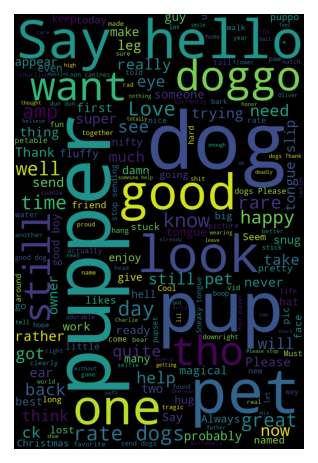

In [68]:
generate_dog_cloud()